In [1]:
import limbo.data

dataset = limbo.data.Dataset("data")

In [2]:
len(dataset)

4

Similarly, use normal notation to access a sample by its index:

In [3]:
dataset[1]

limbo.data.Sample(path='/Users/tshead/src/limbo-user/docs/data/image_0000025.json')

You can also iterate over the samples in a dataset:

In [4]:
for sample in dataset:
    print(sample)

limbo.data.Sample(path='/Users/tshead/src/limbo-user/docs/data/image_0000000.json')
limbo.data.Sample(path='/Users/tshead/src/limbo-user/docs/data/image_0000025.json')
limbo.data.Sample(path='/Users/tshead/src/limbo-user/docs/data/image_0001785.json')
limbo.data.Sample(path='/Users/tshead/src/limbo-user/docs/data/image_0014.json')


In [5]:
dataset = limbo.data.Dataset(["data", "data"])
len(dataset)

8

**Samples**

Now let's go back to our original dataset and focus on the samples themselves:

In [6]:
dataset = limbo.data.Dataset("data")
sample = dataset[1]

The first thing we can do is inspect the sample's filesystem location:

In [7]:
sample.path

'/Users/tshead/src/limbo-user/docs/data/image_0000025.json'

... note that the sample's path is always the path to its JSON metadata file.

Next, let's take a look at the sample's image:

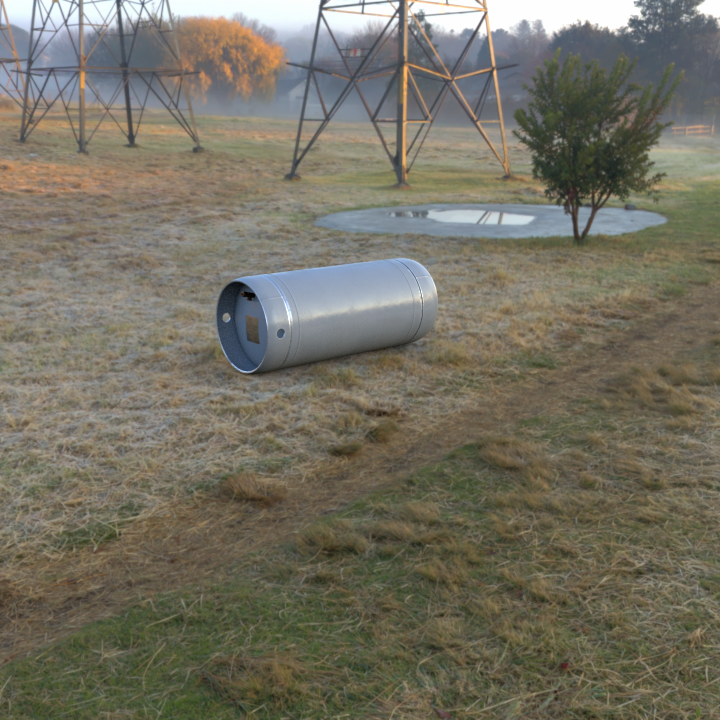

In [8]:
from IPython.display import display

if sample.image:
    display(sample.image)

**Synthetic Samples**

If a sample is synthetically generated (instead of a real photograph), it may have additional information that we can test for.  For instance, a synthetic image with cryptomatte information can provide a ground-truth bounding box for the object in the image:

In [9]:
if sample.synthetic and sample.synthetic.cryptomatte:
    print(sample.synthetic.cryptomatte.bbox())

(214.92359272315335, 257.4370536226934, 222.6302419923792, 116.00767362268033)


In [10]:
if sample.synthetic and sample.synthetic.cryptomatte:
    print(sample.synthetic.cryptomatte.contours())

[array([[257.        , 373.25668588],
       [257.93690969, 373.        ],
       [258.        , 372.97721   ],
       ...,
       [255.        , 373.39696944],
       [256.        , 373.35178746],
       [257.        , 373.25668588]]), array([[226.51132607, 321.        ],
       [226.        , 321.33685895],
       [225.        , 321.48317901],
       [224.        , 321.37528957],
       [223.54996754, 321.        ],
       [223.        , 320.32519655],
       [222.74195465, 320.        ],
       [222.3557814 , 319.        ],
       [222.19531042, 318.        ],
       [222.15605268, 317.        ],
       [222.44486157, 316.        ],
       [222.66498807, 315.        ],
       [223.        , 314.5537076 ],
       [223.43045845, 314.        ],
       [224.        , 313.47857159],
       [224.57032703, 313.        ],
       [225.        , 312.62941523],
       [226.        , 312.52837992],
       [227.        , 312.59489675],
       [227.51327249, 313.        ],
       [228.        , 3

Note that the contours are a collection of one-to-many polygons, where each polygon is an array of 2D absolute pixel coordinates relative to the top-left corner of the image.  Multiple polygons are returned when there are "holes" in the contour, which is the case here.  To understand why this instance contains a hole, let's look at a matte image that contains per-pixel occupancy for this instance:

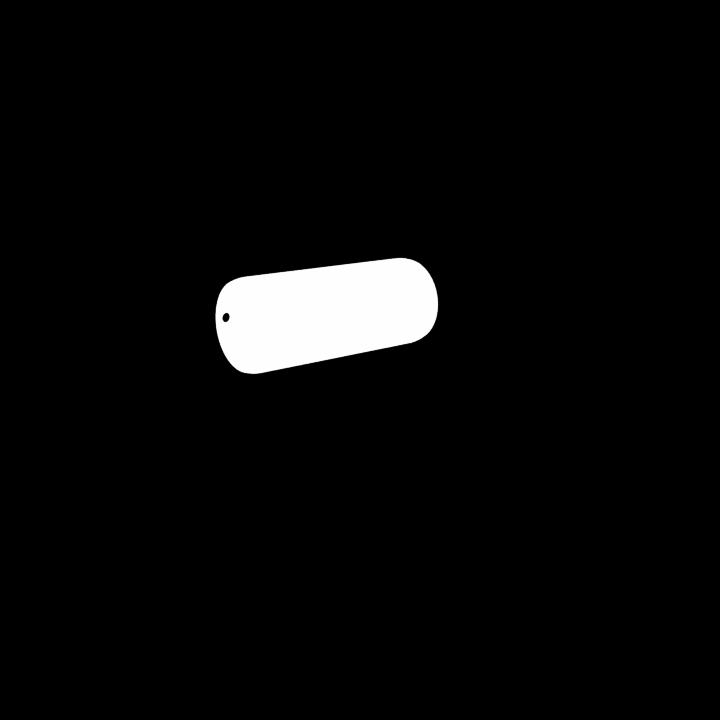

In [11]:
if sample.synthetic and sample.synthetic.cryptomatte:
    display(sample.synthetic.cryptomatte.matte())

If you look near the left edge of the cylinder, you'll see the small black oval where a hole in its side allows the background to show through.

While we're at it, let's view the contours superimposed over the image:

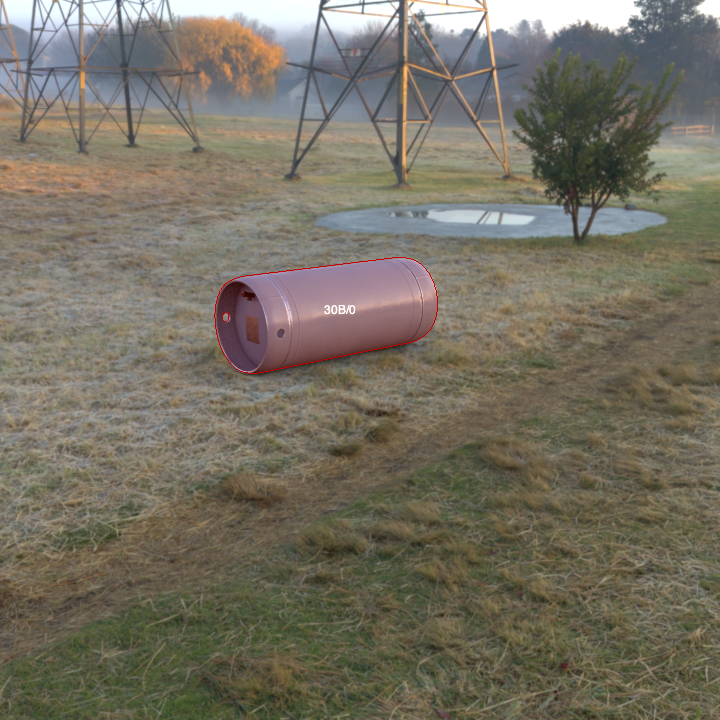

In [12]:
if sample.synthetic and sample.synthetic.cryptomatte:
    display(sample.synthetic.cryptomatte.preview(show_contours=True).makeImageSnapshot())

If you look closely again, you'll see that the second contour outlines the hole in our object.

Finally, we can preview the bounding box over the original image:

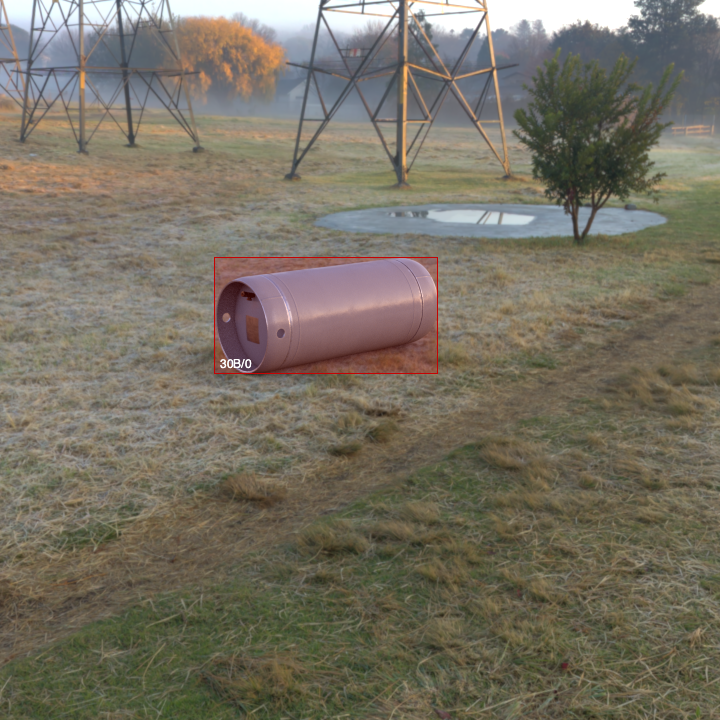

In [13]:
if sample.synthetic and sample.synthetic.cryptomatte:
    display(sample.synthetic.cryptomatte.preview(show_bboxes=True).makeImageSnapshot())